In [1]:
!pip install category_encoders

You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#Import all the things

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.metrics import accuracy_score

# Create the Data Frames

In [215]:
X_df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/train_features.csv')
pd.set_option('display.max_columns', 100)
X_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
y_df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/train_labels.csv')
y_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [216]:
X_test_df= pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/test_features.csv')
X_test_df.head()

# Hold on to this one for later

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
X_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
X_df.isna().sum() #going to move forward with the NaN's for our baseline

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Find our baseline

In [9]:
y_df['status_group'].value_counts(normalize=True) #majority baseline is .543

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [10]:
y = y_df.drop(columns='id')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        X_df, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 40), (14850, 40), (44550, 1), (14850, 1))

In [13]:
majority_class = y_train.mode()
y_pred = np.full(shape=y_test.shape, fill_value=majority_class)

In [14]:
accuracy_score(y_test, y_pred) ##Baseline = majority class using all columns

0.5453198653198653

# Create first model

In [15]:
X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 9), (14850, 9), (44550, 1), (14850, 1))

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.55672278338945

In [18]:
X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
X_test_sc = scale(X_test_sc)
#Testing with Test data
X_test_sc

array([[-0.12798429,  1.9504066 ,  0.18408659, ..., -0.2770127 ,
         0.28136694,  0.74932705],
       [-0.12798429,  1.32999082,  0.39217066, ..., -0.37911642,
         0.23725387,  0.73672887],
       [-0.12798429,  1.32708489,  0.10442199, ..., -0.37911642,
         0.65737833,  0.74722736],
       ...,
       [-0.12798429,  1.19486514,  0.1001475 , ..., -0.37911642,
         0.02719163,  0.74722736],
       [-0.12798429,  0.50034818,  0.20570873, ..., -0.37911642,
        -0.07783948,  0.74617751],
       [-0.12798429, -0.25083439,  0.10399411, ..., -0.2770127 ,
        -0.30890794,  0.74512766]])

In [19]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass1 = ids.join(y_pred_df)

pass1.rename(columns={0:'status_group'}, 
                 inplace=True)

pass1.set_index('id')

pass1.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass1',index=False)


In [20]:
pass1.head() #Pass 1 gets a .55105, slightly better than our baseline

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


# Coefficients

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


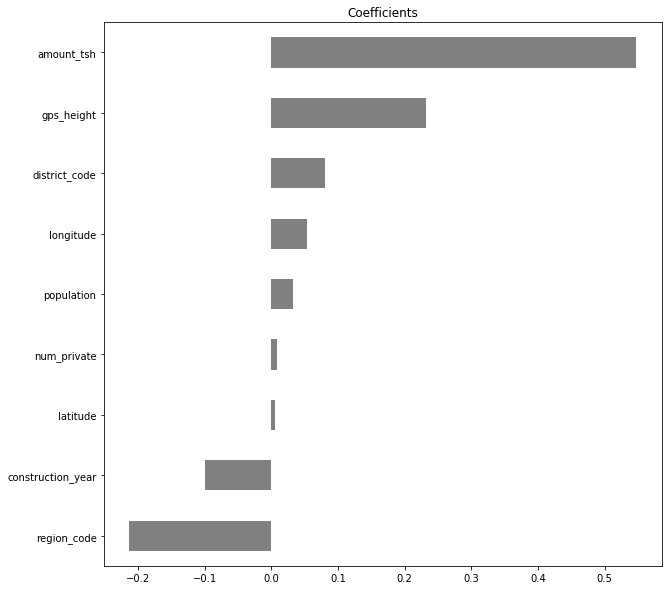

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Coefficients')
new_X = X_df.drop(columns='id')

coefficients = logreg.fit(X_train, y_train).coef_[0]
feature_names = new_X.select_dtypes('number').columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [34]:
X_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [217]:
X_df = X_df.drop(columns='scheme_name') #Too many NaN's to be useful
X_test_df = X_test_df.drop(columns='scheme_name') #Too many NaN's to be useful

In [218]:
X_df['water_quality'] = X_df['water_quality'].replace('unknown', 'unknown_water_quality')
oh_wq = pd.get_dummies(X_df['water_quality'])
X_df = X_df.drop(columns ='water_quality')
X_df = X_df.join(oh_wq)

In [219]:
X_test_df['water_quality'] = X_test_df['water_quality'].replace('unknown', 'unknown_water_quality')
t_oh_wq = pd.get_dummies(X_test_df['water_quality'])
X_test_df = X_test_df.drop(columns ='water_quality')
X_test_df = X_test_df.join(t_oh_wq)

X_test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,coloured,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown_water_quality
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,0,0,0,0,0,0,1,0
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,0,0,0,0,0,0,1,0
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,0,0,0,0,0,0,1,0
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,True,1987,other,other,other,vwc,user-group,unknown,unknown,good,dry,dry,shallow well,shallow well,groundwater,other,other,0,0,0,0,0,0,1,0
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,0,0,0,0,0,1,0


In [220]:
X_df['quantity'] = X_df['quantity'].replace('unknown', 'unknown_quantity')
oh_wq = pd.get_dummies(X_df['quantity'])
X_df = X_df.drop(columns ='quantity')
X_df = X_df.join(oh_wq)

X_test_df['quantity'] = X_test_df['quantity'].replace('unknown', 'unknown_quantity')
t_oh_wq = pd.get_dummies(X_test_df['quantity'])
X_test_df = X_test_df.drop(columns ='quantity')
X_test_df = X_test_df.join(t_oh_wq)

In [221]:
X_df['waterpoint_type_group'] = X_df['waterpoint_type_group'].replace('other', 'other_waterpoint_type_group')
oh_wq = pd.get_dummies(X_df['waterpoint_type_group'])
X_df = X_df.drop(columns ='waterpoint_type_group')
X_df = X_df.join(oh_wq)

X_test_df['waterpoint_type_group'] = X_test_df['waterpoint_type_group'].replace('other', 'other_waterpoint_type_group')
t_oh_wq = pd.get_dummies(X_test_df['waterpoint_type_group'])
X_test_df = X_test_df.drop(columns ='waterpoint_type_group')
X_test_df = X_test_df.join(t_oh_wq)

In [222]:
X_df['source_type'] = X_df['source_type'].replace('unknown', 'unknown_source_type')
X_df['source_type'] = X_df['source_type'].replace('dam', 'dam_source_type')
oh_st = pd.get_dummies(X_df['source_type'])
X_df = X_df.drop(columns ='source_type')
X_df = X_df.join(oh_st)

X_test_df['source_type'] = X_test_df['source_type'].replace('unknown', 'unknown_source_type')
X_test_df['source_type'] = X_test_df['source_type'].replace('dam', 'dam_source_type')
t_oh_wq = pd.get_dummies(X_test_df['source_type'])
X_test_df = X_test_df.drop(columns ='source_type')
X_test_df = X_test_df.join(t_oh_wq)

In [55]:
#PASS 2 with some one hot encoding columns

X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
X_test_sc = scale(X_test_sc)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 35), (14850, 35), (44550, 1), (14850, 1), (14358, 35))

In [57]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7001122334455668

In [58]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass2 = ids.join(y_pred_df)

pass2.rename(columns={0:'status_group'}, 
                 inplace=True)

pass2.set_index('id')

pass2.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass2.csv',index=False)

## Pass 2 gets a .702

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


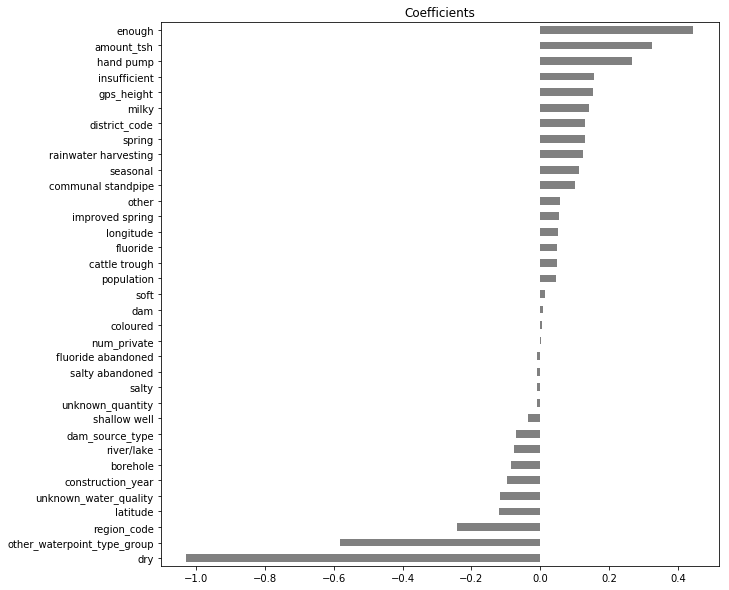

In [59]:
plt.figure(figsize=(10,10))
plt.title('Coefficients')
new_X = X_df.drop(columns='id')

coefficients = logreg.fit(X_train, y_train).coef_[0]
feature_names = new_X.select_dtypes('number').columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [223]:
#Using more techniques for adding OHE features

#X_df['funder'].value_counts().nlargest(30)

X_df.loc[~X_df['funder'].isin(['Government Of Tanzania','Danida','Hesawa','Rwssp',
                      'World Bank','Kkkt','World Vision','Unicef','Tasaf',
                      'District Council','Dhv','Private Individual','Dwsp',
                      0,'Norad','Germany Republi','Tcrs','Ministry Of Water',
                      'Water']), 'funder'] = 'other_funder'

X_test_df.loc[~X_test_df['funder'].isin(['Government Of Tanzania','Danida','Hesawa','Rwssp',
                      'World Bank','Kkkt','World Vision','Unicef','Tasaf',
                      'District Council','Dhv','Private Individual','Dwsp',
                      0,'Norad','Germany Republi','Tcrs','Ministry Of Water',
                      'Water']), 'funder'] = 'other_funder'

#X_df['funder'].value_counts()
X_test_df['funder'].value_counts()

other_funder              7512
Government Of Tanzania    2117
Danida                     774
Hesawa                     573
World Bank                 335
Kkkt                       330
Rwssp                      319
World Vision               306
Unicef                     267
Tasaf                      250
Dhv                        236
Private Individual         205
Dwsp                       193
District Council           192
Norad                      184
Germany Republi            155
Water                      152
Ministry Of Water          130
Tcrs                       128
Name: funder, dtype: int64

In [224]:
oh_f = pd.get_dummies(X_df['funder'])
X_df = X_df.drop(columns ='funder')
X_df = X_df.join(oh_f)

t_oh_f = pd.get_dummies(X_test_df['funder'])
X_test_df = X_test_df.drop(columns ='funder')
X_test_df = X_test_df.join(t_oh_f)

In [225]:
#X_df.wpt_name.value_counts().nlargest(20)

X_df.loc[~X_df['wpt_name'].isin(['none','Shuleni','Zahanati','Msikitini','Kanisani'
                               ,'Bombani','Sokoni','Ofisini','School','Shule Ya Msingi'
                               ,'Shule','Sekondari','Muungano','Mkombozi','Madukani'
                               ,'Hospital','Mbugani','Upendo','Kituo Cha Afya','Mkuyuni'])
                                 , 'wpt_name'] = 'other_wpt_name'

X_test_df.loc[~X_test_df['wpt_name'].isin(['none','Shuleni','Zahanati','Msikitini','Kanisani'
                               ,'Bombani','Sokoni','Ofisini','School','Shule Ya Msingi'
                               ,'Shule','Sekondari','Muungano','Mkombozi','Madukani'
                               ,'Hospital','Mbugani','Upendo','Kituo Cha Afya','Mkuyuni'])
                                 , 'wpt_name'] = 'other_wpt_name'

oh_wptn = pd.get_dummies(X_df['wpt_name'])
X_df = X_df.drop(columns ='wpt_name')
X_df = X_df.join(oh_wptn)

t_oh_wptn = pd.get_dummies(X_test_df['wpt_name'])
X_test_df = X_test_df.drop(columns ='wpt_name')
X_test_df = X_test_df.join(t_oh_wptn)

In [194]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14358 entries, 0 to 14357
Data columns (total 99 columns):
id                             14358 non-null int64
amount_tsh                     14358 non-null float64
date_recorded                  14358 non-null object
gps_height                     14358 non-null int64
installer                      13570 non-null object
longitude                      14358 non-null float64
latitude                       14358 non-null float64
num_private                    14358 non-null int64
basin                          14358 non-null object
subvillage                     14264 non-null object
region                         14358 non-null object
region_code                    14358 non-null int64
district_code                  14358 non-null int64
lga                            14358 non-null object
ward                           14358 non-null object
population                     14358 non-null int64
public_meeting                 13573 non-null 

In [226]:
#PASS 3 with more one hot encoding columns

X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
X_test_sc = scale(X_test_sc)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 75), (14850, 75), (44550, 1), (14850, 1), (14358, 75))

In [156]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7079685746352413

In [157]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass3 = ids.join(y_pred_df)

pass3.rename(columns={0:'status_group'}, 
                 inplace=True)

pass3.set_index('id')

pass3.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass3.csv',index=False)

## Pass 3 gets a .71

# Creating pipeline with SelectKbest

In [158]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

pipe = make_pipeline( 
    SelectKBest(mutual_info_classif), 
    LogisticRegression()
)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [10,25,50,75], 
    'logisticregression__class_weight': [None,'balanced'],
}

gs = GridSearchCV(pipe,param_grid=param_grid, cv=5,
                 scoring='accuracy')

gs.fit(X_train,y_train)

pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__class_weight,param_selectkbest__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,23.412106,0.041428,0.014508,0.001718,None,75,"{'logisticregression__class_weight': None, 'se...",0.713981,0.708418,0.706734,0.712426,0.696487,0.707609,0.006147,1,0.707138,0.708137,0.709063,0.708005,0.711288,0.708726,0.001419
2,22.734389,0.238244,0.013195,0.002888,None,50,"{'logisticregression__class_weight': None, 'se...",0.711288,0.706958,0.705387,0.706589,0.698732,0.705791,0.004055,2,0.705146,0.707688,0.707379,0.703768,0.709744,0.706745,0.002084
1,21.758363,0.341437,0.011146,0.000220,None,25,"{'logisticregression__class_weight': None, 'se...",0.704107,0.703030,0.700898,0.702436,0.696262,0.701347,0.002746,3,0.698272,0.701319,0.699383,0.698577,0.707135,0.700937,0.003276
0,20.811459,0.144893,0.010442,0.001899,None,10,"{'logisticregression__class_weight': None, 'se...",0.698272,0.697980,0.693939,0.702323,0.686834,0.695870,0.005239,4,0.694540,0.697419,0.695623,0.696249,0.697399,0.696246,0.001096
4,20.646118,0.153966,0.009070,0.000554,balanced,10,{'logisticregression__class_weight': 'balanced...,0.690417,0.687318,0.683165,0.691548,0.681895,0.686869,0.003825,5,0.683007,0.686027,0.687009,0.686821,0.690693,0.686711,0.002456
7,23.104757,0.108444,0.013694,0.000364,balanced,75,{'logisticregression__class_weight': 'balanced...,0.695130,0.681706,0.681481,0.684027,0.676507,0.683771,0.006187,6,0.683877,0.686111,0.686785,0.686681,0.687775,0.686246,0.001300
5,21.272926,0.053467,0.011059,0.000215,balanced,25,{'logisticregression__class_weight': 'balanced...,0.690193,0.679125,0.670258,0.678976,0.682007,0.680112,0.006397,7,0.678798,0.679237,0.673176,0.682585,0.690441,0.680847,0.005669
6,22.772712,0.408697,0.012262,0.000544,balanced,50,{'logisticregression__class_weight': 'balanced...,0.689071,0.677778,0.681818,0.677293,0.673027,0.679798,0.005409,8,0.682221,0.680359,0.685297,0.681154,0.683370,0.682480,0.001735


In [159]:
print('Best score:',gs.best_score_)
print('Parameters for best score:', gs.best_params_)

Best score: 0.7076094276094276
Parameters for best score: {'logisticregression__class_weight': None, 'selectkbest__k': 75}


In [160]:
test_score = gs.score(X_test, y_test)
print('Test Score:', test_score)

Test Score: 0.7057912457912457


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


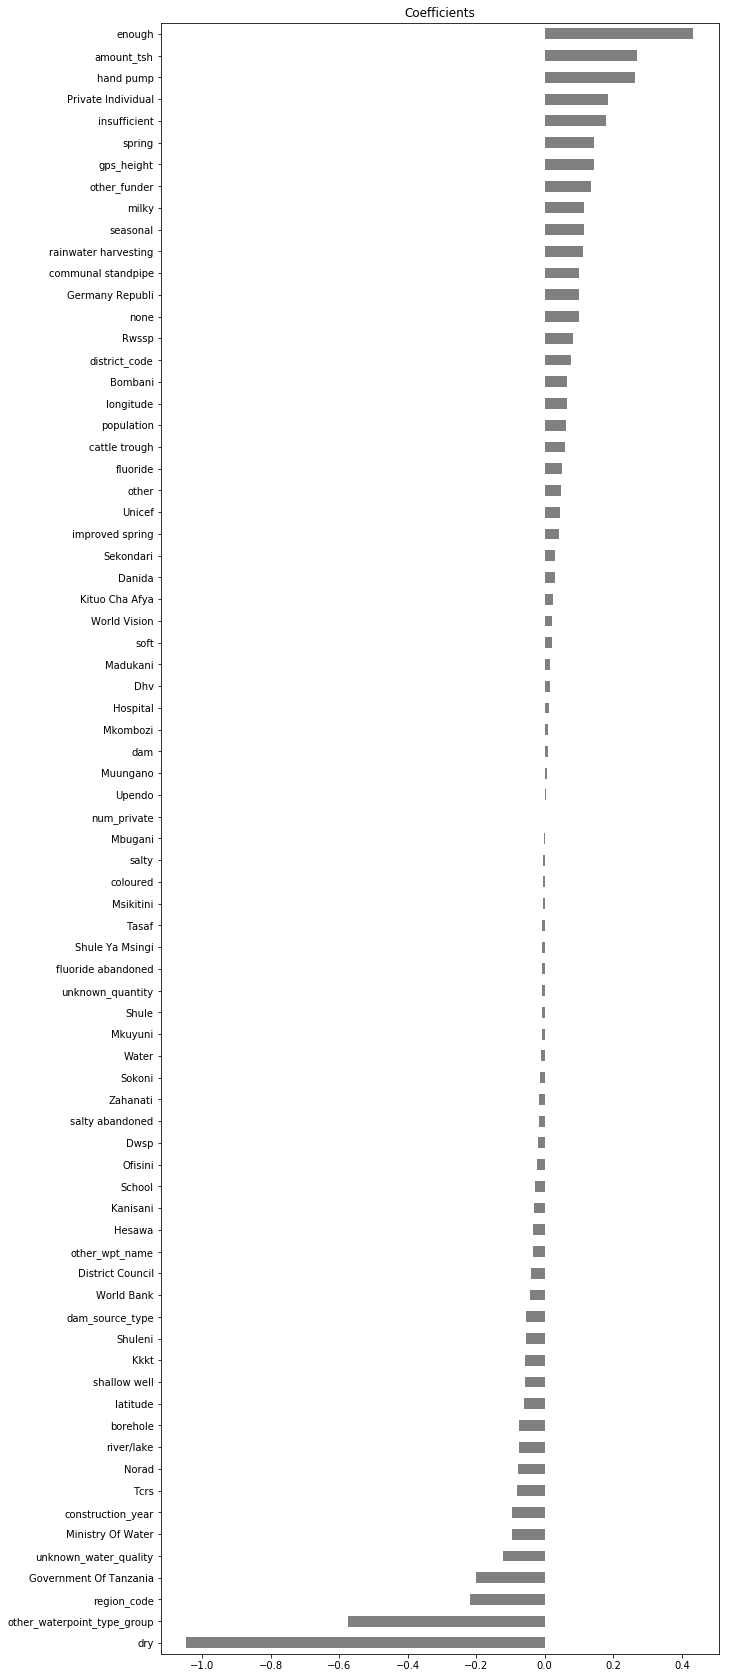

In [162]:
plt.figure(figsize=(10,30))
plt.title('Coefficients')
new_X = X_df.drop(columns='id')

coefficients = logreg.fit(X_train, y_train).coef_[0]
feature_names = new_X.select_dtypes('number').columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [195]:
X_df = X_df.drop(columns=['Muungano','Upendo','num_private','Mbugani','salty','coloured'
                          ,'Msikitini','Tasaf','Shule Ya Msingi','fluoride abandoned','unknown_quantity'
                          ,'Shule'])
X_test_df = X_test_df.drop(columns=['Muungano','Upendo','num_private','Mbugani','salty','coloured'
                                    ,'Msikitini','Tasaf','Shule Ya Msingi','fluoride abandoned','unknown_quantity'
                                    ,'Shule'])

In [209]:
#PASS 4 with dropping lowest coefficients

X = X_df.select_dtypes('number')
X = X.drop(columns='id')
#X = scale(X)

X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
#X_test_sc = scale(X_test_sc)

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

#Drop these columns with VIF above 5
#'dry', 'enough','insufficient', 'seasonal','Government Of Tanzania','other_funder','other_wpt_name','cattle trough', 'communal standpipe',
#        'dam', 'hand pump', 'improved spring', 'other_waterpoint_type_group',
#        'borehole', 'dam_source_type', 'other', 'rainwater harvesting',
#        'river/lake', 'shallow well', 'spring'

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'construction_year', 'fluoride', 'milky',
       'salty abandoned', 'soft', 'unknown_water_quality', 'dry', 'enough',
       'insufficient', 'seasonal', 'cattle trough', 'communal standpipe',
       'dam', 'hand pump', 'improved spring', 'other_waterpoint_type_group',
       'borehole', 'dam_source_type', 'other', 'rainwater harvesting',
       'river/lake', 'shallow well', 'spring', 'Danida', 'Dhv',
       'District Council', 'Dwsp', 'Germany Republi', 'Government Of Tanzania',
       'Hesawa', 'Kkkt', 'Ministry Of Water', 'Norad', 'Private Individual',
       'Rwssp', 'Tcrs', 'Unicef', 'Water', 'World Bank', 'World Vision',
       'other_funder', 'Bombani', 'Hospital', 'Kanisani', 'Kituo Cha Afya',
       'Madukani', 'Mkombozi', 'Mkuyuni', 'Ofisini', 'School', 'Sekondari',
       'Shuleni', 'Sokoni', 'Zahanati', 'none', 'other_wpt_name'],
      dtype='object') 




/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[1.0151392231197203, 2.7658506571696035, 1.7667397588615101, 1.9907586921703817, 2.2234693865730755, 2.0241710411776386, 1.1273344543401247, 2.789819410837726, 1.0485018272402649, 1.2868351007186776, 1.0846176951412616, 1.7421914954139233, 1.7961680107129494, 9.658190242825864, 25.720044608477046, 20.219122285329245, 7.577351891469899, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 4.513055494019139, 1.997038178435513, 1.9769513684702067, 2.0884636811530473, 1.784746603922303, 9.965054103381911, 3.6036515437405012, 2.498931433914444, 1.7273281996957595, 1.937664063446274, 1.9986225947314793, 2.7305073843150938, 1.6962592137185966, 2.224311250460363, 1.7289821077658685, 2.564080949477801, 2.4453583261893805, 17.67197979486681, 1.2536245124137506, 1.079759146657226, 1.2677028485254924, 1.0766145007889634, 1.0893579356104939, 1.0972521269192377, 1.0747457067178046, 1.2115410126858308, 1.1865700028761355, 1.1217249383990555, 2.406108758449992, 1.218662736303543, 1.6865967

In [210]:
X = X.drop(columns=['dry', 'enough','insufficient', 'seasonal',
                    'Government Of Tanzania','other_funder','other_wpt_name',
                    'cattle trough', 'communal standpipe','dam', 'hand pump',
                    'improved spring', 'other_waterpoint_type_group','borehole',
                    'dam_source_type', 'other', 'rainwater harvesting',
                    'river/lake', 'shallow well', 'spring'])
                          
X_test_sc = X_test_sc.drop(columns=['dry', 'enough','insufficient', 'seasonal',
                    'Government Of Tanzania','other_funder','other_wpt_name',
                    'cattle trough', 'communal standpipe','dam', 'hand pump',
                    'improved spring', 'other_waterpoint_type_group','borehole',
                    'dam_source_type', 'other', 'rainwater harvesting',
                    'river/lake', 'shallow well', 'spring'])
                          
 #Dropping all these columns caused accuracy to go down too much                         

In [211]:
X = scale(X)
X_test_sc = scale(X_test_sc)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 43), (14850, 43), (44550, 1), (14850, 1), (14358, 43))

In [213]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.590662177328844

In [214]:
logreg.fit(X_test,y_test)
y_pred = logreg.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5985185185185186

In [231]:
print('Best score:',gs.best_score_)
print('Parameters for best score:', gs.best_params_)

Best score: 0.7072502805836139
Parameters for best score: {'logisticregression__class_weight': None, 'selectkbest__k': 75}
